<a href="https://colab.research.google.com/github/MayerT1/Pakistan_Research/blob/main/Copy_of_Pakistan_Activity_1_Prelim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.7 MB/s eta 0:00:00


## Import geemap library

The [geemap](https://github.com/gee-community/geemap) Python package has two plotting backends: [ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet) and [folium](https://github.com/python-visualization/folium). A key difference between folium and ipyleaflet is that ipyleaflet is built upon ipywidgets and allows bidirectional communication between the front-end and the backend enabling the use of the map to capture user input, while folium is meant for displaying static data only ([source](https://blog.jupyter.org/interactive-gis-in-jupyter-with-ipyleaflet-52f9657fa7a)). Note that Google Colab currently does not support ipyleaflet ([source](https://github.com/googlecolab/colabtools/issues/60#issuecomment-596225619)). Therefore, if you are using geemap with Google Colab, geemap will automatically use the folium plotting backend.

In [ ]:
import ee
import geemap
import geemap.chart as chart

In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 43.8 MB/s eta 0:00:00


In [ ]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import rasterio
import xarray as xr

## Create an interactive map

In [ ]:
Map = geemap.Map()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/cloud-platform%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=vseEOZbunxkFG0BHjJL5bJVhuKtQAOww-fmftpk9uVg&tc=BKaODiKSRkoAPinjJ5GzBJnc8kixu4VOdRZcA2sk2J8&cc=zQtxv5hrESgTtTSB88y3dnX7EgtxRiZEbr4NWxdPpfA

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AdLIrYftfN7aePZEhLFcR8sHIeRYj1h5PFf4dDQt2eMWS_Au5GMSHCQmfPY

Successfully saved authorization token.


# JS-> Python script rip  -Use if needed--

In [ ]:
js_snippet = """

Add code here

"""

In [ ]:
geemap.js_snippet_to_py(
    js_snippet, add_new_cell=True, import_ee=True, import_geemap=True, show_map=True
)

In [ ]:
lines = geemap.js_snippet_to_py(js_snippet, add_new_cell=False, import_ee=True, import_geemap=True, show_map=True)
for line in lines:
    print(line.rstrip())

## Add Earth Engine data

In [ ]:
# # Add Earth Engine dataset
# image = ee.Image("USGS/SRTMGL1_003")

# # Set visualization parameters.
# vis_params = {
#     "min": 0,
#     "max": 4000,
#     "palette": ["006633", "E5FFCC", "662A00", "D8D8D8", "F5F5F5"],
# }

# # Print the elevation of Mount Everest.
# xy = ee.Geometry.Point([86.9250, 27.9881])
# elev = image.sample(xy, 30).first().get("elevation").getInfo()
# print("Mount Everest elevation (m):", elev)

# # Add Earth Engine layers to Map
# Map.addLayer(image, vis_params, "DEM")
# Map.addLayer(xy, {"color": "red"}, "Mount Everest")

# # Center the map based on an Earth Engine object or coordinates (longitude, latitude)
# # Map.centerObject(xy, 4)
# Map.setCenter(86.9250, 27.9881, 4)

Mount Everest elevation (m): 8729


In [ ]:
#//////////Khyber Pakhtunkhwa
admin2 = ee.FeatureCollection("users/tjm0042/PHD/Pa_Admin_2")
#Map.addLayer(admin2, {}, "admin2")

pa = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017").filter(ee.Filter.eq('country_na','Pakistan'))
#Map.addLayer(pa, {}, "pa")

KP = admin2.filter(ee.Filter.eq('ADM1_EN', "Khyber Pakhtunkhwa"))
#Map.addLayer(KP,{},"Khyber Pakhtunkhwa")

#// Malakand Division = Bajaur District, Buner District, Central Dir District, Upper Chitral District, Lower Chitral District, Lower Dir District, Upper Dir District, Malakand District, Shangla District, Swat District
admin2_M1 = admin2.filter(ee.Filter.eq('ADM2_EN', "Bajaur"))
admin2_M2 = admin2.filter(ee.Filter.eq('ADM2_EN', "Buner"))
admin2_M3 = admin2.filter(ee.Filter.eq('ADM2_EN', "Chitral Upper"))
admin2_M4 = admin2.filter(ee.Filter.eq('ADM2_EN', "Chitral Lower"))
admin2_M5 = admin2.filter(ee.Filter.eq('ADM2_EN', "Lower Dir"))
admin2_M6 = admin2.filter(ee.Filter.eq('ADM2_EN', "Upper Dir"))
admin2_M7 = admin2.filter(ee.Filter.eq('ADM2_EN', "Malakand"))
admin2_M8 = admin2.filter(ee.Filter.eq('ADM2_EN', "Shangla"))
admin2_M9 = admin2.filter(ee.Filter.eq('ADM2_EN', "Swat"))

Malakand_Division = admin2_M1.merge(admin2_M2).merge(admin2_M3).merge(admin2_M4).merge(admin2_M5).merge(admin2_M6).merge(admin2_M7).merge(admin2_M8).merge(admin2_M9)
#Map.addLayer(Malakand_Division, {color: '83CDF5'}, "Malakand_Division")


#//Hazara
#//Hazara = Abbottabad, Haripur, Mansehra, Battagram, Upper Kohistan, Lower Kohistan, Kolai Pallas Kohistan and Torghar

admin2_H1 = admin2.filter(ee.Filter.eq('ADM2_EN', "Abbottabad"))
admin2_H2 = admin2.filter(ee.Filter.eq('ADM2_EN', "Haripur"))
admin2_H3 = admin2.filter(ee.Filter.eq('ADM2_EN', "Mansehra"))
admin2_H4 = admin2.filter(ee.Filter.eq('ADM2_EN', "Batagram"))
admin2_H5 = admin2.filter(ee.Filter.eq('ADM2_EN', "Kohistan Upper"))
admin2_H6 = admin2.filter(ee.Filter.eq('ADM2_EN', "Kohistan Lower"))
admin2_H7 = admin2.filter(ee.Filter.eq('ADM2_EN', "Kolai Palas Kohistan"))
admin2_H8 = admin2.filter(ee.Filter.eq('ADM2_EN', "Tor Ghar"))

Hazara_Division = admin2_H1.merge(admin2_H2).merge(admin2_H3).merge(admin2_H4).merge(admin2_H5).merge(admin2_H6).merge(admin2_H7).merge(admin2_H8)
#Map.addLayer(Hazara_Division, {color: '83F5B0'}, "Hazara_Division")


#//Southern Region Division= D. I. Khan, Lakki Marwat, Karak, Hangu, Kohat, Peshawar, Tank, Bannu, Nowshera, Mardan, Charsadda, Swabi

admin2_S1 = admin2.filter(ee.Filter.eq('ADM2_EN', "D. I. Khan"))
admin2_S2 = admin2.filter(ee.Filter.eq('ADM2_EN', "Lakki Marwat"))
admin2_S3 = admin2.filter(ee.Filter.eq('ADM2_EN', "Karak"))
admin2_S4 = admin2.filter(ee.Filter.eq('ADM2_EN', "Hangu"))
admin2_S5 = admin2.filter(ee.Filter.eq('ADM2_EN', "Kohat"))
admin2_S6 = admin2.filter(ee.Filter.eq('ADM2_EN', "Peshawar"))
admin2_S7 = admin2.filter(ee.Filter.eq('ADM2_EN', "Tank"))
admin2_S8 = admin2.filter(ee.Filter.eq('ADM2_EN', "Bannu"))
admin2_S9 = admin2.filter(ee.Filter.eq('ADM2_EN', "Nowshera"))
admin2_S10 = admin2.filter(ee.Filter.eq('ADM2_EN', "Mardan"))
admin2_S11 = admin2.filter(ee.Filter.eq('ADM2_EN', "Charsadda"))
admin2_S12 = admin2.filter(ee.Filter.eq('ADM2_EN', "Swabi"))


Southern_Central_Regions_Division = admin2_S1.merge(admin2_S2).merge(admin2_S3).merge(admin2_S4).merge(admin2_S5).merge(admin2_S6).merge(admin2_S7).merge(admin2_S8).merge(admin2_S9).merge(admin2_S10).merge(admin2_S11).merge(admin2_S12)
#Map.addLayer(Southern_Central_Regions_Division, {color: 'BF83F5'}, "Southern_Central_Regions_Division")
#// print(admin2)


BTAP_P1 = Malakand_Division.merge(Hazara_Division).merge(Southern_Central_Regions_Division)
Map.addLayer(BTAP_P1, {"color": "red"}, "BTAP_P1 Bounds")
Map.centerObject(BTAP_P1, 7)
#/////

# GEDI: GEDI02_B_002_MONTHLY

In [ ]:
# m = geemap.Map()

def qualityMask(im):
  return im.updateMask(im.select('l2b_quality_flag').eq(1)) \
      .updateMask(im.select('degrade_flag').eq(0))

gedi = ee.ImageCollection('LARSE/GEDI/GEDI02_B_002_MONTHLY') \
                  .map(qualityMask)

def func_vni(image):  return image.clip(BTAP_P1)
# gedi_clip = gedi.map(function(image) { return image.clip(Southern_Central_Regions_Division); }
gedi_clip = gedi.map(func_vni)

# gediVis = {
#   'min': 1,
#   'max': 60,
#   'palette': ["006633", "E5FFCC", "662A00", "D8D8D8", "F5F5F5"],
# }

# Map.addLayer(gedi_clip.select("pai_z29"), gediVis, 'GEDI02_B_002_MONTHLY')
Map.addLayer(gedi_clip, {}, 'gedi_clip')

Cross compare GEDI rf predicted using rh 100 to UMD tch
https://code.earthengine.google.com/8a17e4367a23c0314593c3bf29f7999a

In [ ]:
pariedviz = {
  'bands': ["GEDI_rh100_predicted","UMD_TCH","UMD_TCH"],
  'gamma': 1,
  'max': 20.14475440979004,
  'min': 0,
  'opacity': 1,
};

pairedimages = ee.Image("users/tjm0042/PHD/GEDI_Height/paired_GEDI_RH100_UMD_TCH")
Map.addLayer(pairedimages, pariedviz, 'pairedimages')

In [ ]:
pairedImage_GTE = pairedimages.gte(4);
pairedImage_GTE_only = pairedimages.updateMask(pairedImage_GTE);
Map.addLayer(pairedImage_GTE_only,pariedviz, 'pairedImage_GTE_only')

In [ ]:
FDH = ee.Image("users/tjm0042/PHD/GEDI_Height/predicted_fhd_normal2")

FDHviz = {
  'min': 0,
  'max': 5,
  'palette': ['#edf8fb','#b2e2e2','#66c2a4','#2ca25f','#006d2c'],
  'bands': ['fhd_normal']
};




Map.addLayer(FDH, FDHviz, "FDH")

In [ ]:
# def func_TCH_FC (image):  return image.sample(UMD_TCH).clip(BTAP_P1)


# UMD_TCH = ee.ImageCollection("projects/servir-hkh/RLCMS/HKH/UMD/tch")


# TCH_FC = UMD_TCH.map(func_TCH_FC)

# Map.addLayer(TCH_FC, {}, "TCH_FC")

AttributeError: 'FeatureCollection' object has no attribute 'clip'

## Display the map

In [ ]:
Map

Map(bottom=13351.0, center=[34.35242944074085, 71.9642832917203], controls=(WidgetControl(options=['position',…

In [ ]:
# removing values below 4
bounds = pairedimages.geometry()
my_sample = pairedimages.sample(bounds, 300)
property = "GEDI_rh100_predicted"

options = {
    "title": "GEDI_rh100_predicted",
    "xlabel": "GEDI_rh100_predicted",
    "ylabel": "Pixel count",
    "colors": ["#1d6b99"],
}

chart.feature_histogram(my_sample, property, **options)

# source = pairedimages.toBands()
bounds = pairedimages.geometry()
my_sample_2 = pairedimages.sample(bounds, 300)
property = "UMD_TCH"

options_2 = {
    "title": "UMD_TCH",
    "xlabel": "UMD_TCH",
    "ylabel": "Pixel count",
    "colors": ["#FFEA00"],
}

chart.feature_histogram(my_sample_2, property, **options_2)

In [ ]:
# # removing values below 4
# bounds = pairedimages.geometry()
# my_sample = pairedImage_GTE_only.sample(bounds, 100)
# property = "GEDI_rh100_predicted"

# options = {
#     "title": "GEDI_rh100_predicted",
#     "xlabel": "GEDI_rh100_predicted",
#     "ylabel": "Pixel count",
#     "colors": ["#1d6b99"],
# }

# chart.feature_histogram(my_sample, property, **options)

# # source = pairedimages.toBands()
# bounds = pairedimages.geometry()
# my_sample_2 = pairedImage_GTE_only.sample(bounds, 100)
# property = "UMD_TCH"

# options_2 = {
#     "title": "UMD_TCH",
#     "xlabel": "UMD_TCH",
#     "ylabel": "Pixel count",
#     "colors": ["#FFEA00"],
# }

# chart.feature_histogram(my_sample_2, property, **options_2)

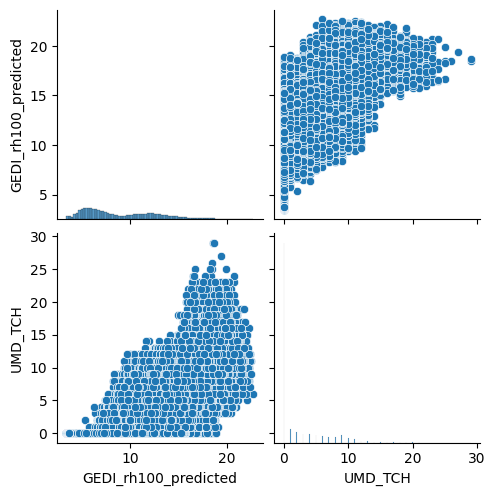

In [ ]:
gdf = geemap.ee_to_df(my_sample)
sns.pairplot(gdf)

<Axes: xlabel='GEDI_rh100_predicted', ylabel='UMD_TCH'>

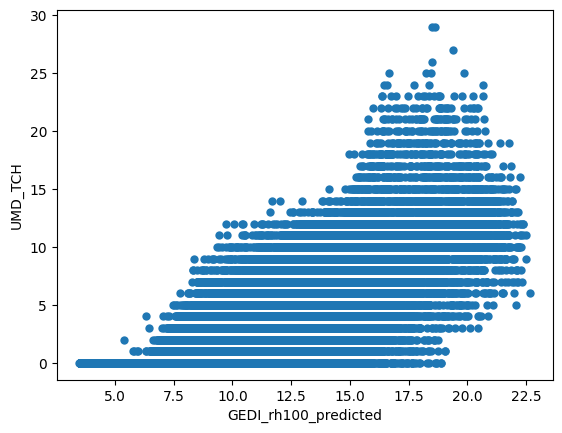

In [ ]:
sns.scatterplot(x="GEDI_rh100_predicted", y="UMD_TCH",
                # hue="clarity", size="depth",
                # palette="ch:r=-.2,d=.3_r",
                # hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=gdf)#, ax=ax)

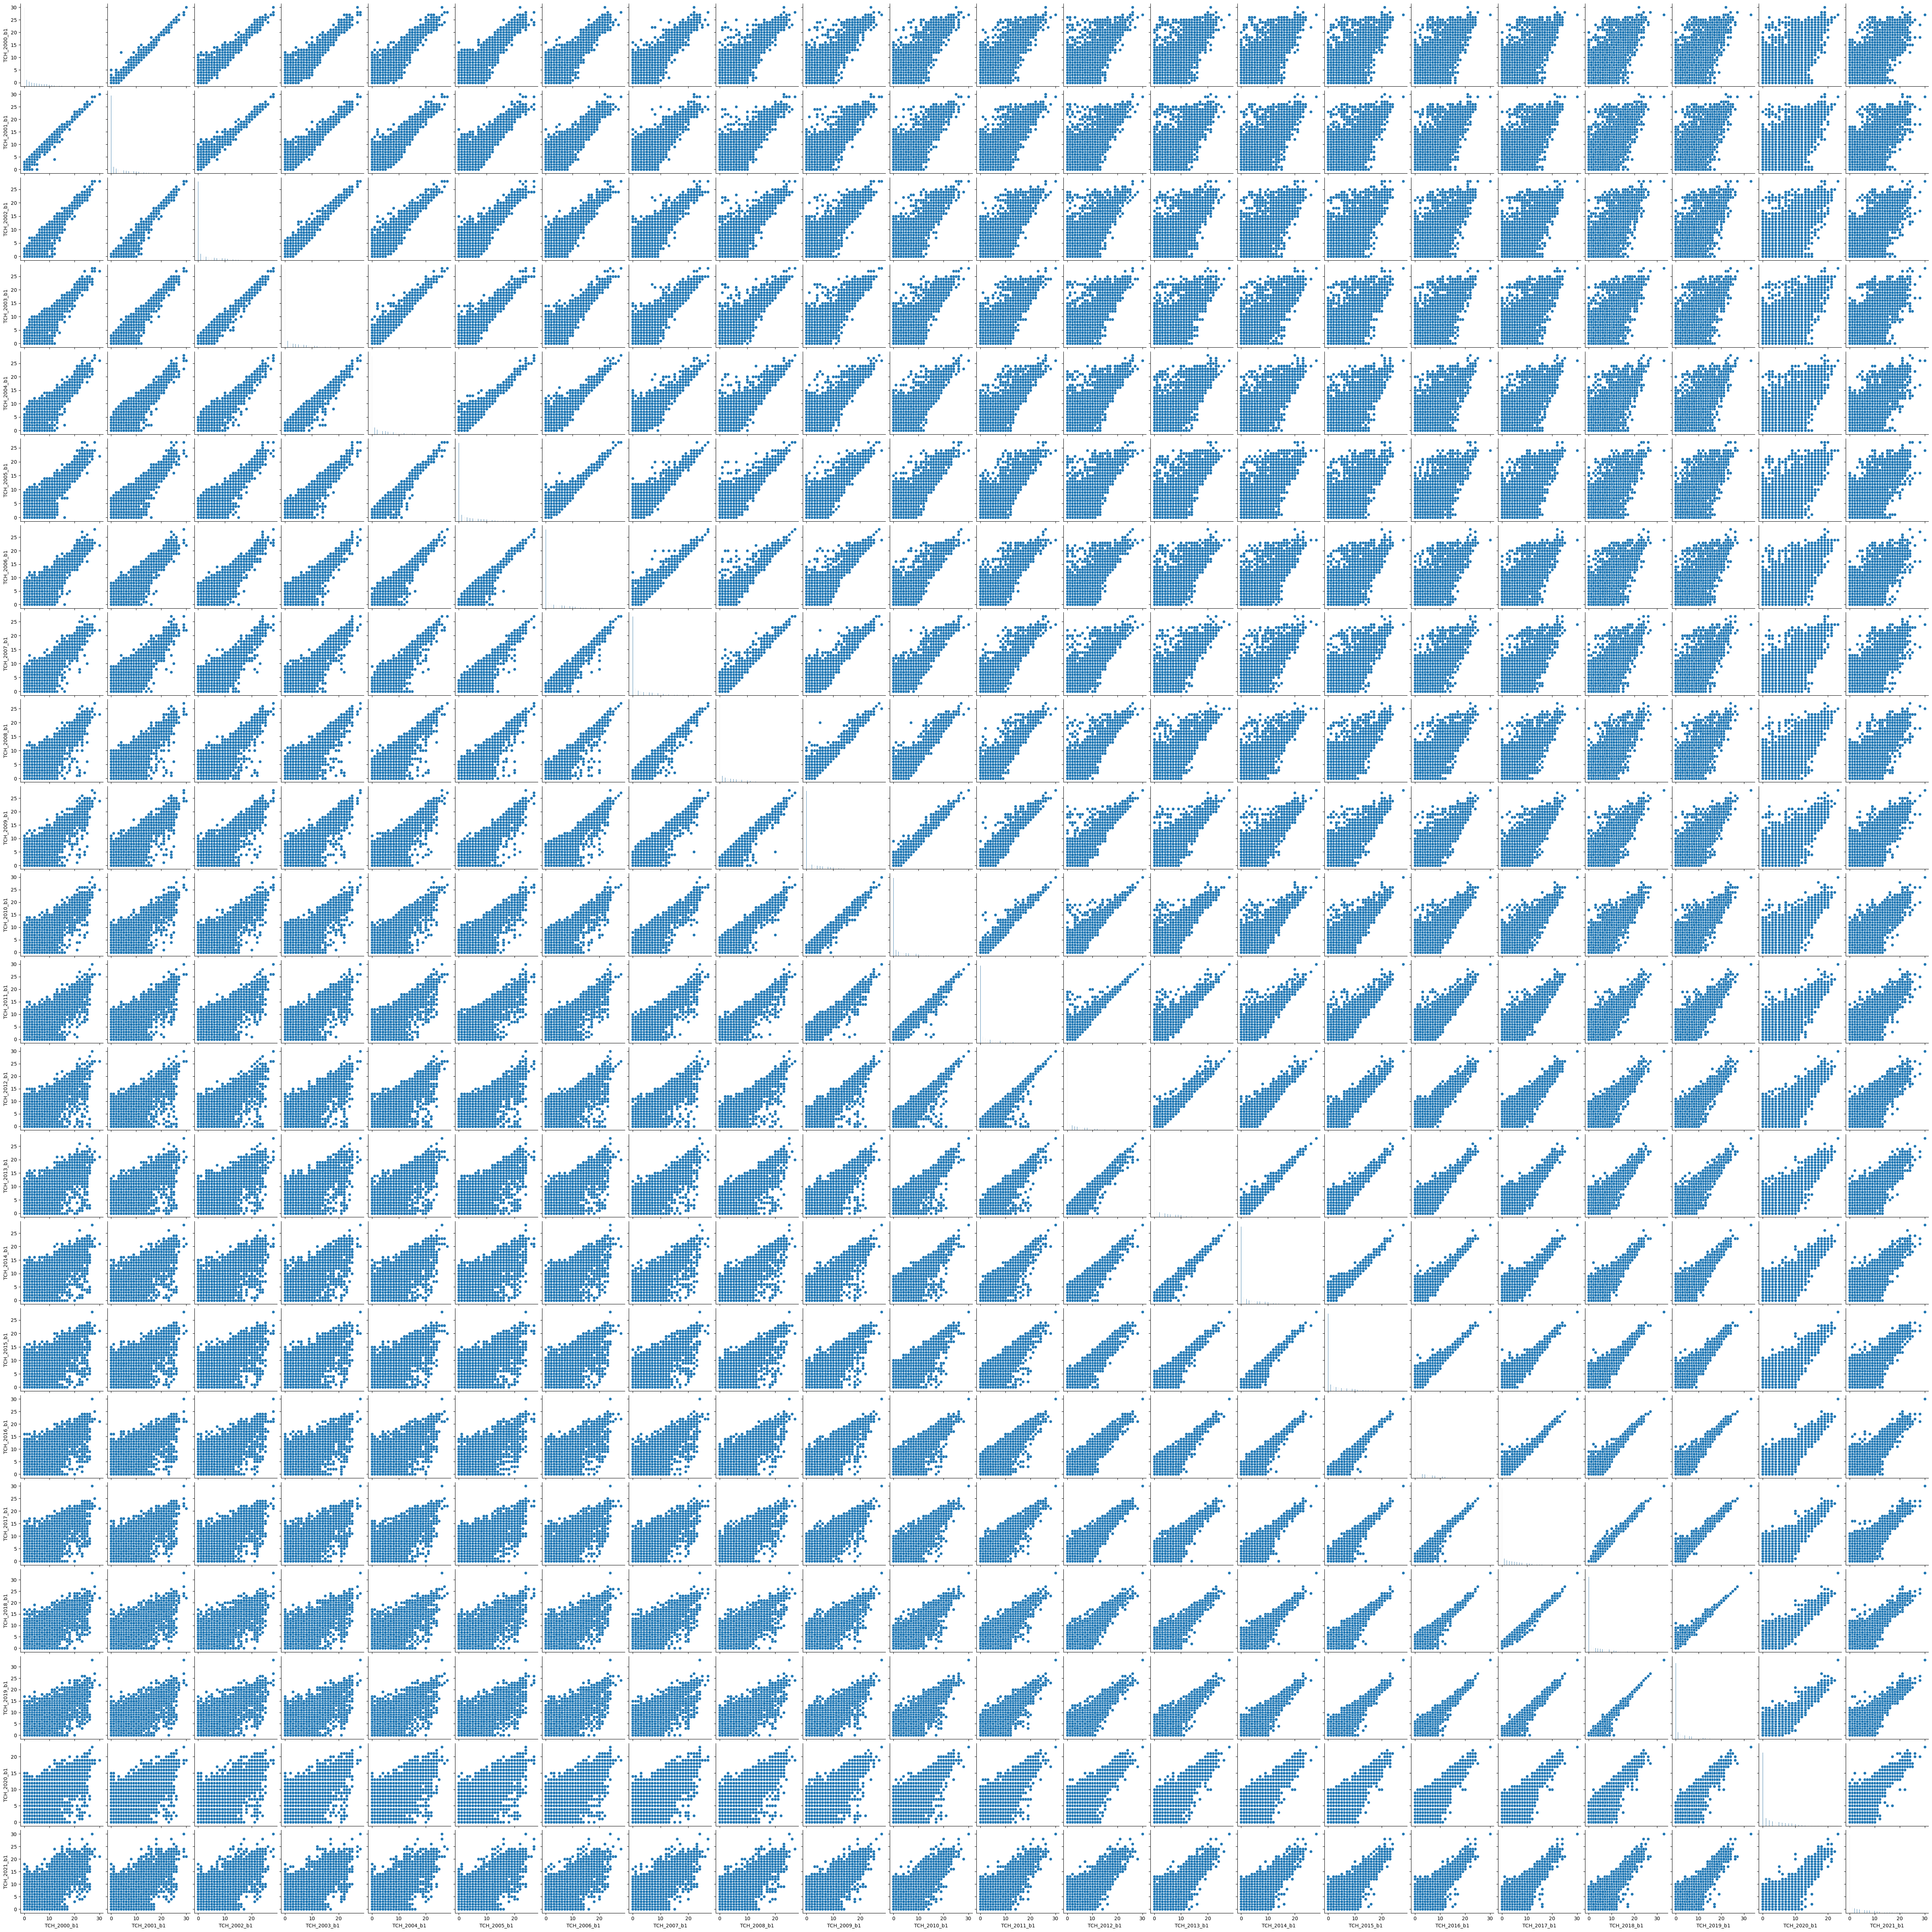

In [ ]:
UMD_TCH = ee.Image("users/tjm0042/PHD/GEDI_Height/UMD_TCH_FC") #users/tjm0042/PHD/GEDI_Height/UMD_TCH_FC
# Map.addLayer(UMD_TCH, {}, "UMD_TCH", false)

# removing values below 4
bounds = pairedimages.geometry()
my_sample_UMD_TCH = UMD_TCH.sample(bounds, 300)
# property = "GEDI_rh100_predicted"

# options = {
#     "title": "GEDI_rh100_predicted",
#     "xlabel": "GEDI_rh100_predicted",
#     "ylabel": "Pixel count",
#     "colors": ["#1d6b99"],
# }

#chart.feature_histogram(my_sample, property, **options)


my_sample_UMD_TCH_gdf = geemap.ee_to_df(my_sample_UMD_TCH)
sns.pairplot(my_sample_UMD_TCH_gdf)

In [ ]:
my_sample_UMD_TCH_gdf

TCH_2000_b1  TCH_2001_b1  TCH_2002_b1  TCH_2003_b1  TCH_2004_b1  \
0                 0            0            0            0            1   
1                 9            9            9            9            9   
2                 8            9            9            9            9   
3                 0            0            0            0            0   
4                 2            2            1            1            1   
...             ...          ...          ...          ...          ...   
116348            0            0            0            0            0   
116349            0            0            0            0            0   
116350            0            0            0            0            0   
116351            0            0            0            0            0   
116352            0            0            0            0            0   

        TCH_2005_b1  TCH_2006_b1  TCH_2007_b1  TCH_2008_b1  TCH_2009_b1  ...  \
0                 1            2            4            5            6  ...   
1                 9            9           10           10           10  ...   
2                 9            9            9            9            9  ...   
3                 0            0            0            0            0  ...   
4                 0            0            0            0            0  ...   
...             ...          ...          ...          ...          ...  ...   
116348            0            0            0            0            0  ...   
116349            0            0            0            0            0  ...   
116350            0            0            0            0            0  ...   
116351            0            0            0            0            0  ...   
116352            0            0            0            0            0  ...   

        TCH_2012_b1  TCH_2013_b1  TCH_2014_b1  TCH_2015_b1  TCH_2016_b1  \
0                 8            7            6            5            2   
1                11           11            9            9            9   
2                10           10            8            8            7   
3                 0            0            0            0            0   
4                 0            0            0            0            0   
...             ...          ...          ...          ...          ...   
116348            0            0            0            0            0   
116349            0            0            0            0            0   
116350            0            0            0            0            0   
116351            0            0            0            0            0   
116352            0            0            0            0            0   

        TCH_2017_b1  TCH_2018_b1  TCH_2019_b1  TCH_2020_b1  TCH_2021_b1  
0                 2            3            3            4            6  
1                 9            9            7            5            7  
2                 7            7            6            2            3  
3                 0            0            0            0            0  
4                 0            0            0            0            0  
...             ...          ...          ...          ...          ...  
116348            0            0            0            0            0  
116349            0            0            0            0            0  
116350            0            0            0            0            0  
116351            0            0            0            0            0  
116352            0            0            0            0            0  

[116353 rows x 22 columns]

In [ ]:
df_stack = my_sample_UMD_TCH_gdf.stack()
df_stack.head()

0  TCH_2000_b1    0
   TCH_2001_b1    0
   TCH_2002_b1    0
   TCH_2003_b1    0
   TCH_2004_b1    1
dtype: int64

In [ ]:
import seaborn as sns
sns.set_theme(style="white")

# df = sns.load_dataset("penguins")
# df
g = sns.JointGrid(data= df_stack, x=df_stack, y=df_stack, space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

KeyboardInterrupt: 

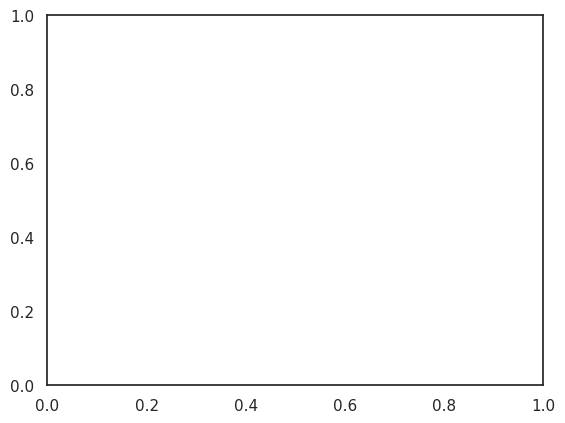

In [ ]:
sns.kdeplot(x=df_stack, y=df_stack, levels=5, color="w", linewidths=1)

In [ ]:
import plotly.figure_factory as ff
import numpy as np

# # Add histogram data
# x1 = np.random.randn(200) - 2
# x2 = np.random.randn(200)
# x3 = np.random.randn(200) + 2
# x4 = np.random.randn(200) + 4

# # Group data together
# hist_data = [x1, x2, x3, x4]

# group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']

# Create distplot with custom bin_size
# fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
# fig.show()


group_labels = ["TCH_2000_b1","TCH_2001_b1", "TCH_2002_b1","TCH_2003_b1", "TCH_2004_b1", "TCH_2005_b1", "TCH_2006_b1", "TCH_2007_b1", "TCH_2008_b1", "TCH_2009_b1", "TCH_2010_b1", "TCH_2011_b1", "TCH_2012_b1", "TCH_2013_b1", "TCH_2014_b1", "TCH_2015_b1","TCH_2016_b1","TCH_2017_b1", "TCH_2018_b1", "TCH_2019_b1","TCH_2020_b1","TCH_2021_b1"]
# Create distplot with custom bin_size
fig = ff.create_distplot(my_sample_UMD_TCH_gdf, group_labels, bin_size=.2)
fig.show()


KeyError: 0

# other ideas below----ignore

In [ ]:
gnpy = geemap.ee_to_numpy(gedi_clip.first(),admin2_M1,1000 )
gnpy

In [ ]:
import numpy
#a = numpy.asarray([ [1,2,3], [4,5,6], [7,8,9] ])
numpy.savetxt("foo.csv", gnpy.ravel(), delimiter=",")

In [ ]:
gdf = geemap.ee_to_df(pairedimages)

TypeError: ee_object must be an ee.FeatureCollection

In [ ]:
chart = ui.Chart.image
        .series({
          imageCollection: gedi_clip,
          region: BTAP_P1,
          reducer: ee.Reducer.mean(),
          scale: 500,
          xProperty: 'system:time_start'
        })

chart

IndentationError: unexpected indent (<ipython-input-36-ad28175ae68c>, line 2)

# Pairplot Approach

In [ ]:
def func_zgd(image):
  return image.sampleRegions(BTAP_P1).flatten()
# gedi_clip_samp = gedi_clip.map(function(image) { 'return image.sampleRegions(**{collection': BTAP_P1, 'scale': 100, 'geometries': True}); }
gedi_clip_samp = gedi_clip.map(func_zgd)

In [ ]:
x = ee.FeatureCollection(gedi_clip_samp)

In [ ]:
gdf = geemap.ee_to_df(x)   #https://geemap.org/common/#geemap.common.ee_to_csv

In [ ]:
gdf

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[50850 rows x 0 columns]

In [ ]:
sns.pairplot(gdf)

<Axes: ylabel='Count'>

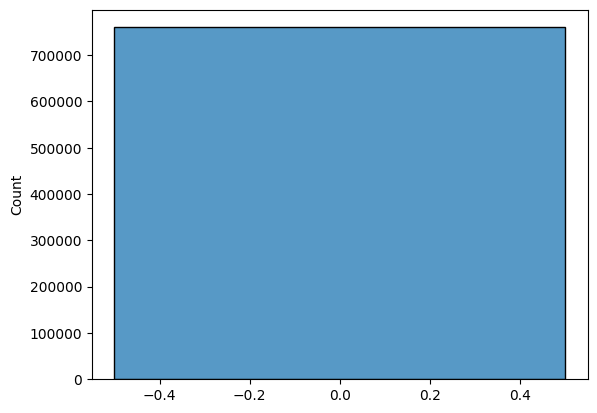

In [ ]:
sns.histplot(gnpy.ravel())

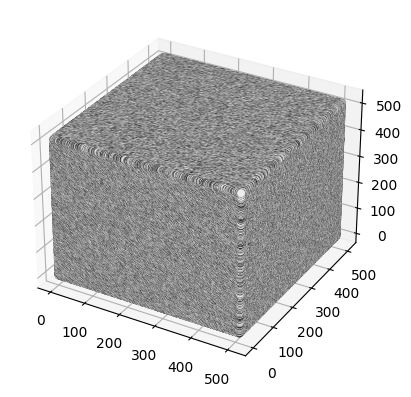

In [ ]:
import functools
import itertools as IT
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def cartesian_product_broadcasted(*arrays):
    """
    http://stackoverflow.com/a/11146645/190597 (senderle)
    """
    broadcastable = np.ix_(*arrays)
    broadcasted = np.broadcast_arrays(*broadcastable)
    dtype = np.result_type(*arrays)
    rows, cols = functools.reduce(np.multiply, broadcasted[0].shape), len(broadcasted)
    out = np.empty(rows * cols, dtype=dtype)
    start, end = 0, rows
    for a in broadcasted:
        out[start:end] = a.reshape(-1)
        start, end = end, end + rows
    return out.reshape(cols, rows).T

# @profile  # used with `python -m memory_profiler script.py` to measure memory usage
def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    size = 512
    volume = np.random.rand(size, size, size)
    x, y, z = cartesian_product_broadcasted(*[np.arange(size, dtype='int16')]*3).T
    mask = ((x == 0) | (x == size-1)
            | (y == 0) | (y == size-1)
            | (z == 0) | (z == size-1))
    x = x[mask]
    y = y[mask]
    z = z[mask]
    volume = volume.ravel()[mask]

    ax.scatter(x, y, z, c=volume, cmap=plt.get_cmap('Greys'))
    plt.show()

if __name__ == '__main__':
    main()


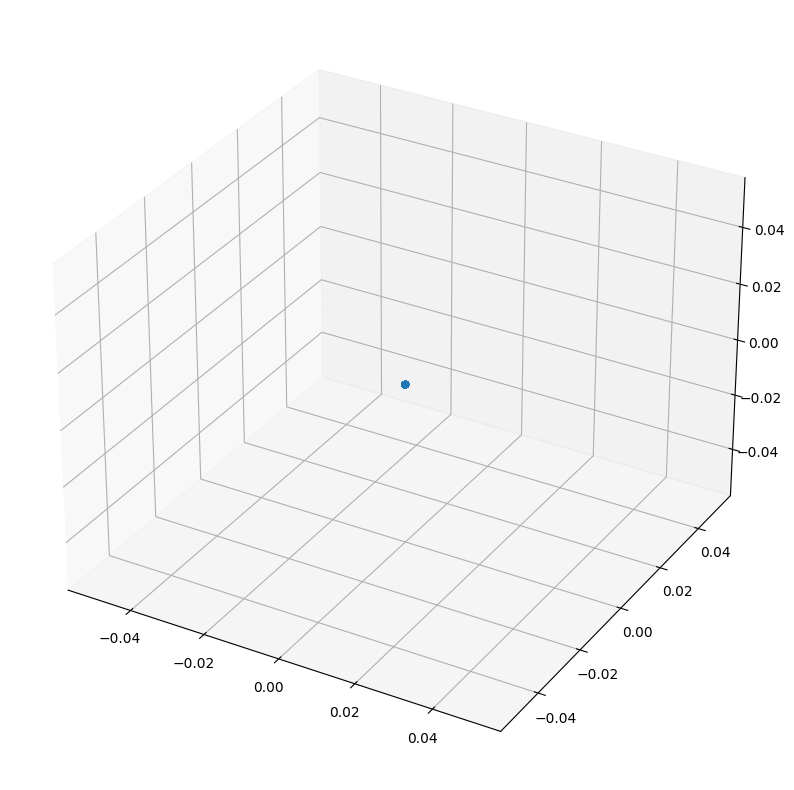

In [ ]:
from itertools import product
from matplotlib import pyplot as plt
N = 8
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
space = np.array([*product(range(N), range(N), range(N))]) # all possible triplets of numbers from 0 to N-1
volume = np.random.rand(N, N, N) # generate random data
# ax.scatter(space[:,0], space[:,1], space[:,2], c=space/8, s=volume*300)

ax.scatter(gnpy[:,0], gnpy[:,1], gnpy[:,2])#, c=gnpy/8, s=gnpy*300)
